In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
x = np.linspace(start=-8, stop=8, num=10000)
x.shape

(10000,)

In [61]:
y = np.sin(x)+np.random.normal(scale = 0.1, size = len(x))
y.shape

(10000,)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


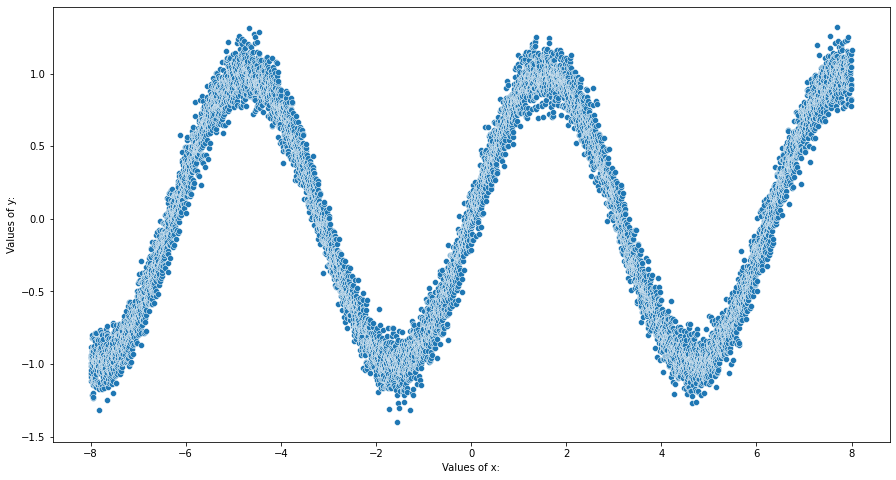

In [93]:
plt.figure(figsize=(15,8))
sns.scatterplot(x, y)
plt.xlabel("Values of X:")
plt.ylabel("Values of Y:")
plt.show()

In [94]:
df = pd.DataFrame({"x":x,"y":y})
df.head()

,x,y
0,-8.000000,-0.994948
1,-7.998400,-0.938949
2,-7.996800,-1.073289
3,-7.995200,-0.961804
4,-7.993599,-1.012871


## Assignment problem statement

Take a trigonometric function and a choose an error function (N(0, sigma-sq)). Generate  data  set of 10,000 instances. Fit polynomials of order 1 - 10 and estimate and plot total error, Bias, Variance,   

training and validation error for each  using 10-fold cross validation.   Create the folds using Python function and compute all errors using the equations given in textbook.  Select the optimal model.

For the selected model, estimate and plot total error, Bias, Variance,    training and validation error for training set sizes  1K, 2K, ... 10K. Use 10-fold cross validation for each training set, and the functions coded earlier for estimating the error.

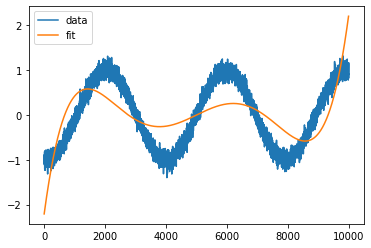

In [78]:
poly = np.polyfit(df["x"], df["y"], deg=5)

fig, ax = plt.subplots()
ax.plot(df["y"], label='data')
ax.plot(np.polyval(poly, x), label='fit')
ax.legend()

In [96]:
folds = [df.loc[0:999], df.loc[1000:1999], df.loc[2000:2999], df.loc[3000:3999], df.loc[4000:4999], 

         df.loc[5000:5999], df.loc[6000:6999], df.loc[7000:7999], df.loc[8000:8999], df.loc[9000:9999]]

In [106]:
pd.concat(folds[:0] + folds[1+1:])

,x,y
2000,-4.799680,0.786270
2001,-4.798080,0.813339
2002,-4.796480,0.967919
2003,-4.794879,0.838213
2004,-4.793279,0.912363
...,...,...
9995,7.993599,0.924283
9996,7.995200,0.894148
9997,7.996800,1.046042
9998,7.998400,0.819295


In [ ]:
excluded_index = i
indexed_list = a_list[:excluded_index] + a_list[excluded_index+1:]

In [80]:
from random import seed
from random import randrange
 
# Split a dataset into k folds
def cross_validation_split(dataset, folds=3):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / folds)
    for i in range(folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split
 
# test cross validation split
seed(1)
dataset = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
folds = cross_validation_split(dataset, 4)
print(folds)

[[], [], [], [], [], [], [], [], [], []]


In [123]:
from math import sqrt
 
# Calculate mean squared error
def mse_metric(actual, predicted):
    squared_sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        squared_sum_error += (prediction_error ** 2)
    mean_squared_error = squared_sum_error / float(len(actual))
    return mean_squared_error
 
# Test MSE
actual = df["y"]
predicted = np.polyval(poly, x)
mse = mse_metric(actual, predicted)
print(mse)

0      -0.994948
1      -0.938949
2      -1.073289
3      -0.961804
4      -1.012871
          ...   
9995    0.924283
9996    0.894148
9997    1.046042
9998    0.819295
9999    1.163641
Name: y, Length: 10000, dtype: float64
3.214308406103943


Polynomial of degree  1 : 
0.49794425340036497
Polynomial of degree  2 : 
0.4483949970267846
Polynomial of degree  3 : 
0.446090606624885
Polynomial of degree  4 : 
0.387123907890034
Polynomial of degree  5 : 
0.23634030563556163
Polynomial of degree  6 : 
0.09772961274083523
Polynomial of degree  7 : 
0.03614344361201707
Polynomial of degree  8 : 
0.015406793034863114
Polynomial of degree  9 : 
0.010984062972831408
Polynomial of degree  10 : 
0.010211908499098693
Polynomial of degree  1 : 
0.4994521071315133
Polynomial of degree  2 : 
0.49791742768635755
Polynomial of degree  3 : 
0.44214294241206015
Polynomial of degree  4 : 
0.43188353308545285
Polynomial of degree  5 : 
0.27892499501843593
Polynomial of degree  6 : 
0.27848204368060536
Polynomial of degree  7 : 
0.037290691613948226
Polynomial of degree  8 : 
0.03496487703259492
Polynomial of degree  9 : 
0.011211368860132652
Polynomial of degree  10 : 
0.011209238631730708
Polynomial of degree  1 : 
0.4904738739243609


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


Polynomial of degree  2 : 
0.49009725710740853
Polynomial of degree  3 : 
0.4511564690572263
Polynomial of degree  4 : 
0.44687696598123156
Polynomial of degree  5 : 
0.23927187139863584
Polynomial of degree  6 : 
0.22801274930642093
Polynomial of degree  7 : 
0.03758123985565462
Polynomial of degree  8 : 
0.037371280162044364
Polynomial of degree  9 : 
0.011306100836458487
Polynomial of degree  10 : 
0.011305891934551523
Polynomial of degree  1 : 
0.5170720397901676
Polynomial of degree  2 : 
0.5132026678623416
Polynomial of degree  3 : 
0.3687195449918161
Polynomial of degree  4 : 
0.36752290651697267
Polynomial of degree  5 : 
0.2555077852729667
Polynomial of degree  6 : 
0.25514524140605715
Polynomial of degree  7 : 
0.043185680142545806
Polynomial of degree  8 : 
0.04318540990989476
Polynomial of degree  9 : 
0.011397964442736655
Polynomial of degree  10 : 
0.011387335931658953
Polynomial of degree  1 : 
0.5109092821257469
Polynomial of degree  2 : 
0.5037592957944758
Polynomial o

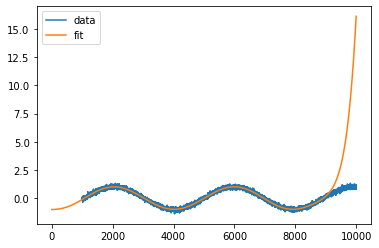

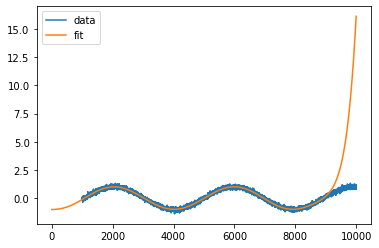

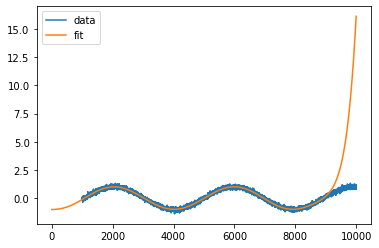

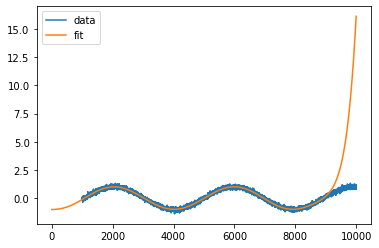

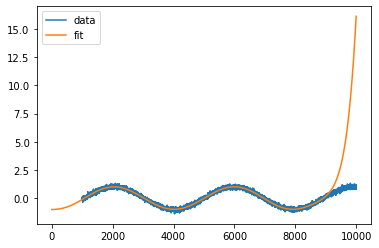

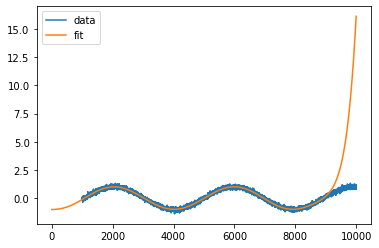

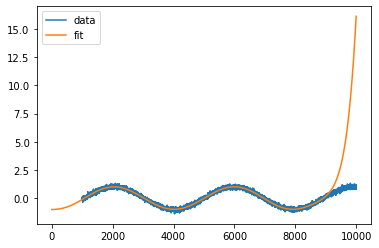

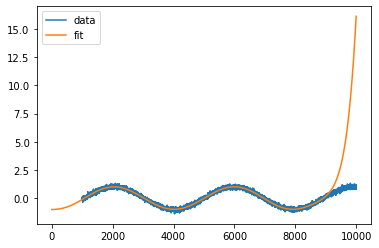

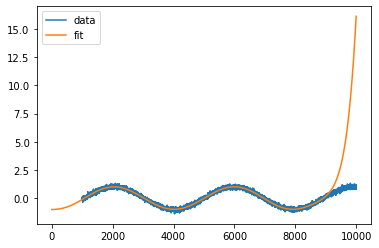

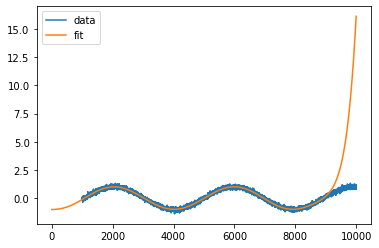

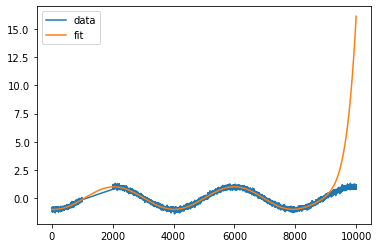

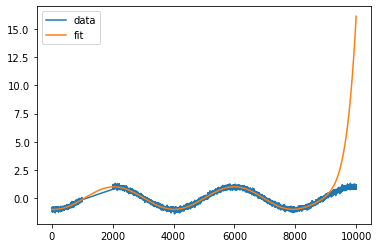

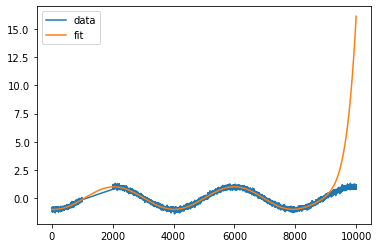

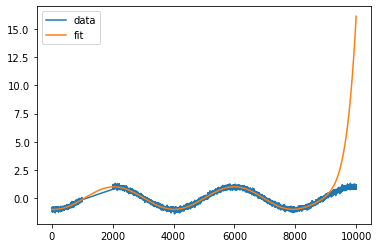

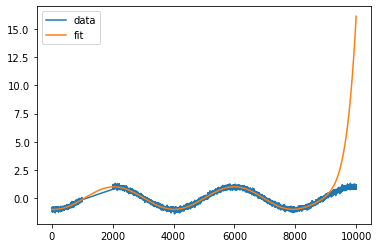

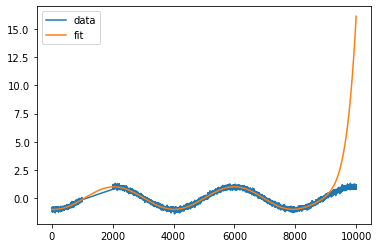

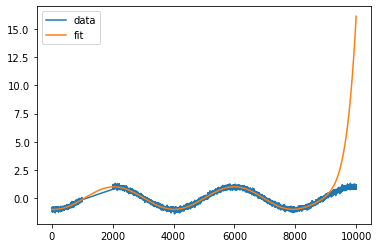

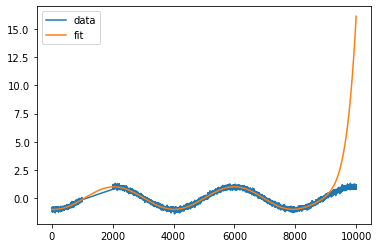

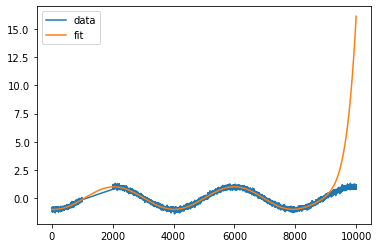

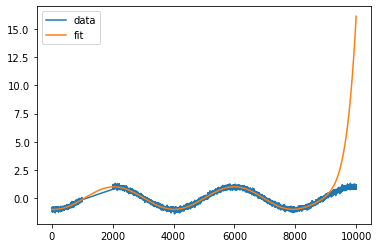

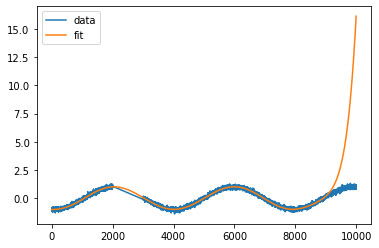

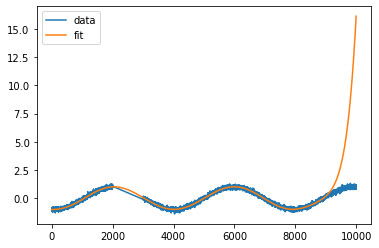

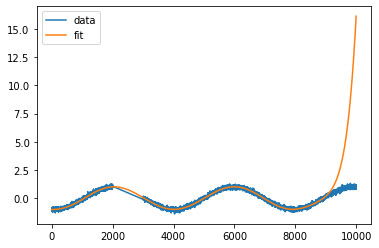

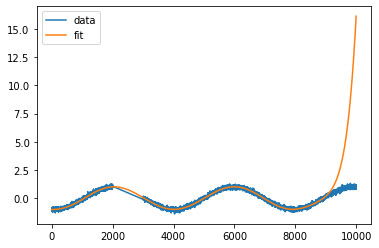

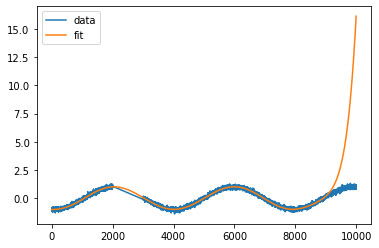

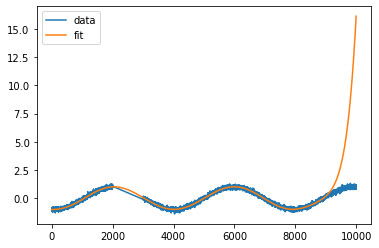

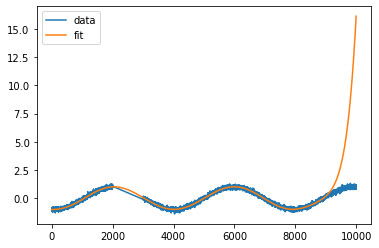

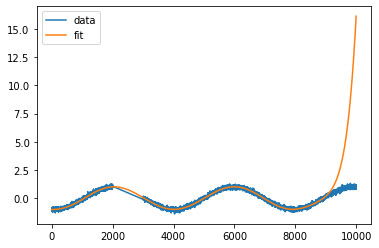

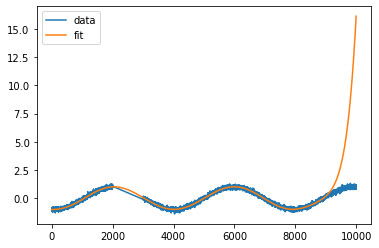

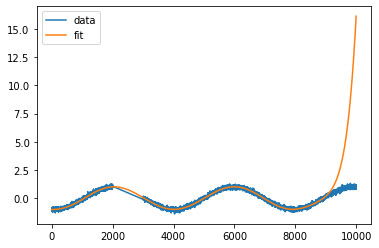

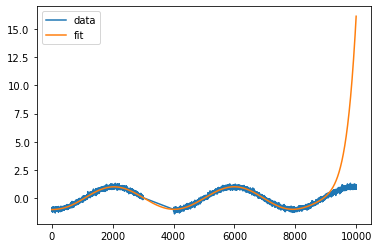

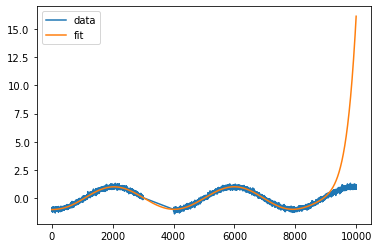

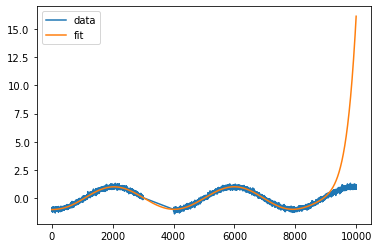

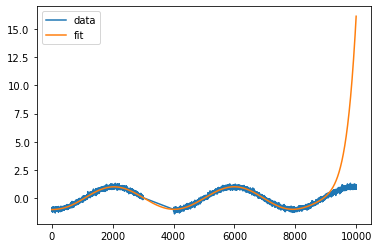

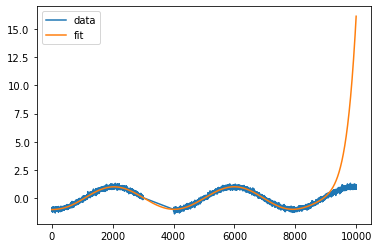

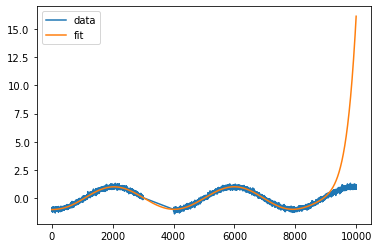

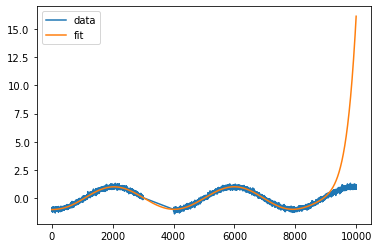

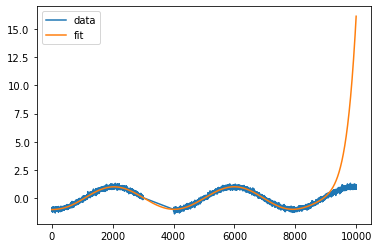

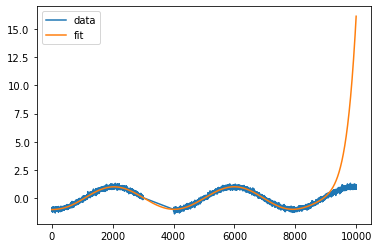

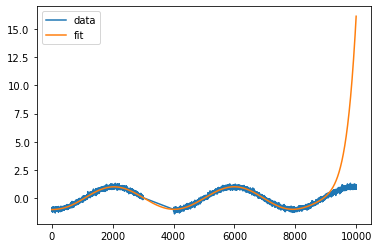

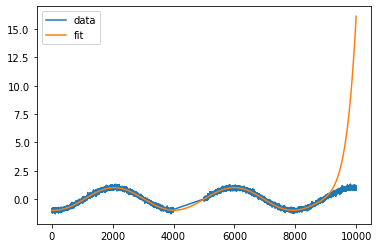

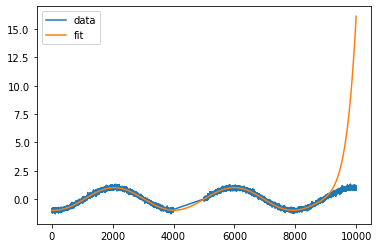

In [ ]:
for i in range(0,10):
    train_data = pd.concat(folds[:i] + folds[i+1:])
    for j in range(1,11):
        poly = np.polyfit(train_data["x"], train_data["y"], deg=j)
        pred = np.polyval(poly, train_data["x"])
        fig, ax = plt.subplots()
        ax.plot(train_data["y"], label='data')
        ax.plot(predicted, label='fit')
        ax.legend()
        actual = list(train_data["y"])
        print("Polynomial of degree ",j,": ")
        print(mse_metric(actual, pred))
    

In [89]:
poly

array([ 3.35496164e-04, -1.50581811e-06, -2.03702002e-02,  9.70639302e-05,
        2.05512598e-01, -2.28579735e-03])